In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By #클릭을 하기위한 요소를 찾는 기능
from bs4 import BeautifulSoup
import pandas as pd
import time
import requests
import numpy as np

import re
pd.set_option('display.max_colwidth', None)

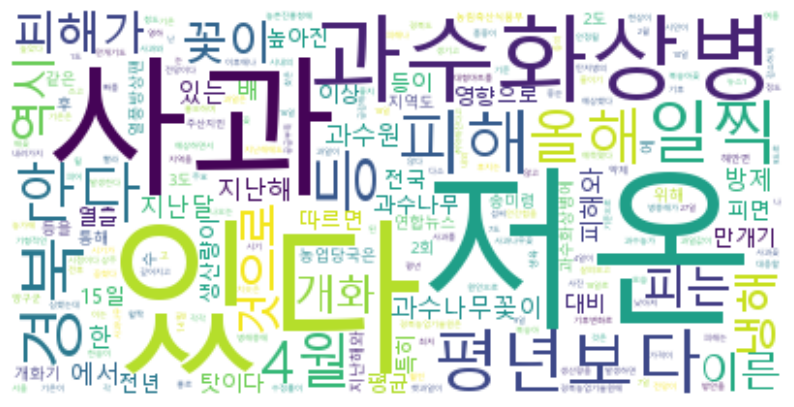

In [18]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def crawl_naver_news(query):
    url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={query}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    news_articles = []
    for item in soup.select('.news_area'):
        title = item.select_one('.news_tit').text.strip()
        link = item.select_one('.news_tit')['href']
        news_articles.append({'title': title, 'link': link})

    return news_articles

def generate_wordcloud(text):
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

query = "영주시 사과"
news_articles = crawl_naver_news(query)

all_text = ""
for article in news_articles:
    article_url = article['link']
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        content = soup.select_one('.article_body').get_text()
        all_text += content
    except :
        print('')

generate_wordcloud(all_text)

In [ ]:
# 사과 모양의 이미지를 불러와서 마스크로 사용
apple_mask = np.array(Image.open("apple_shape.png"))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', mask=apple_mask)

# 워드 클라우드에 텍스트 입력
wordcloud.generate(text)

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import numpy as np
from PIL import Image
import random

def crawl_naver_news(query):
    url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={query}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    news_articles = []
    for item in soup.select('.news_area'):
        title = item.select_one('.news_tit').text.strip()
        link = item.select_one('.news_tit')['href']
        news_articles.append({'title': title, 'link': link})

    return news_articles



def generate_wordcloud(text, not_in_list, img_name):

    icon = Image.open(img_name)
    mask = Image.new('RGB', icon.size, (255, 255, 255))
    mask.paste(icon, icon)
    mask = np.array(mask)

    # 불용어 제거
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in not_in_list]
    filtered_text = ' '.join(filtered_text)

    # 워드클라우드 색상 함수 정의
    def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        colors = [(255, 0, 0), (0, 255, 0)]  # 빨간색과 초록색
        return f"rgb{random.choice(colors)}"

    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
                        background_color='white', 
                        mask=mask,
                        color_func=random_color_func)
    wordcloud.generate(filtered_text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

query = "영주시 사과"
news_articles = crawl_naver_news(query)

all_text = ""
for article in news_articles:
    article_url = article['link']
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        content = soup.select_one('.article_body').get_text()
        all_text += content
    except:
        print()

# 불용어 리스트 불러오기
not_in_list = pd.read_csv('./notinword_list.csv', encoding='cp949', names=['단어', 'n'], header=None)['단어'].tolist()

c:\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (119446048 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


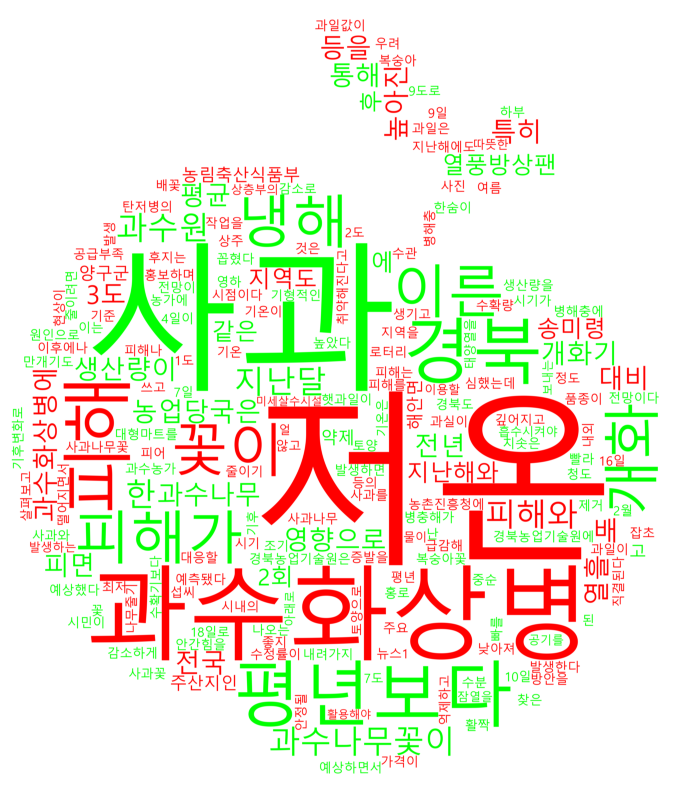

In [4]:
generate_wordcloud(all_text, not_in_list, './apple_shape.png')